In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import torch
import warnings
warnings.filterwarnings('ignore')

from fddbenchmark import FDDDataset, FDDDataloader, FDDEvaluator

from fdd_defense.models import MLP, TCN, GRU
from fdd_defense.attackers import *
from fdd_defense.defenders import *
from fdd_defense.utils import accuracy

### Dataset preparation
https://github.com/airi-industrial-ai/fddbenchmark.git - fdd benchmark with TEP dataset

In [2]:
dataset = FDDDataset(name='reinartz_tep')
scaler = StandardScaler()
scaler.fit(dataset.df[dataset.train_mask])
dataset.df[:] = scaler.transform(dataset.df)

Reading data/reinartz_tep/dataset.csv:   0%|          | 0/5600000 [00:00<?, ?it/s]

Reading data/reinartz_tep/labels.csv:   0%|          | 0/5600000 [00:00<?, ?it/s]

Reading data/reinartz_tep/train_mask.csv:   0%|          | 0/5600000 [00:00<?, ?it/s]

Reading data/reinartz_tep/test_mask.csv:   0%|          | 0/5600000 [00:00<?, ?it/s]

### Model creation and training
window_size -- the size of sliding window  
model -- can be selected from MLP, TCN and GRU

In [3]:
window_size = 32
model = TCN(
        window_size=window_size,
        step_size=1,
        device='cuda',
        kernel_size=5,
        num_layers=4,
        dilation_base=1,
        num_epochs=10,
        batch_size=512,
        lr=0.001,
        )
model.fit(dataset)

#model = MLP(
#        window_size=window_size,
#        step_size=1,
#        device='cuda',
#        hidden_dim=2048,
#        num_epochs=20,
#        batch_size=512,
#        lr=0.001,
#        )
#model = GRU(
#        window_size=window_size,
#        step_size=1,
#        device='cuda',
#        hidden_dim=128,
#        num_epochs=5,
#        batch_size=512,
#        lr=0.001,
#        )

Creating sequence of samples: 100%|████████| 2240/2240 [00:04<00:00, 535.39it/s]


Epochs ...:   0%|          | 0/10 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 1, Loss: 0.1071


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 2, Loss: 0.0652


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 3, Loss: 0.0593


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 4, Loss: 0.0564


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 5, Loss: 0.0528


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 6, Loss: 0.0504


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 7, Loss: 0.0484


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 8, Loss: 0.0464


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 9, Loss: 0.0450


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 10, Loss: 0.0434


### Accuracy of the model

In [5]:
attacker = NoAttacker(model, eps=0.05) # no attack
defender = NoDefenceDefender(model) # no defense
acc = accuracy(attacker, defender, step_size=1)
print(f'Accuracy: {acc:.4f}')

Creating sequence of samples: 100%|██████████| 560/560 [00:01<00:00, 536.35it/s]


  0%|          | 0/2154 [00:00<?, ?it/s]

Accuracy: 0.9064


### Accuracy of the model under attack
epsilon -- limits the maximum shift in attacked data  
attacker -- can be selected from FGSMAttacker, NoiseAttacker, PGDAttacker, CarliniWagnerAttacker, DeepFoolAttacker and DistillationBlackBoxAttacker

In [6]:
eps_space = np.linspace(1e-6, 0.3, 20)
unprotected_acc = []
defender = NoDefenceDefender(model)
for eps in eps_space:
    attacker = FGSMAttacker(model, eps=eps)
    unprotected_acc.append(accuracy(attacker, defender, step_size=10))

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 588.13it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 575.85it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 575.08it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 572.50it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 573.82it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 571.01it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 587.21it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 586.03it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 583.83it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 567.99it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 584.88it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:01<00:00, 551.08it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 585.04it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 585.24it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 587.35it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 586.24it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 588.71it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 582.99it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 586.97it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 584.74it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

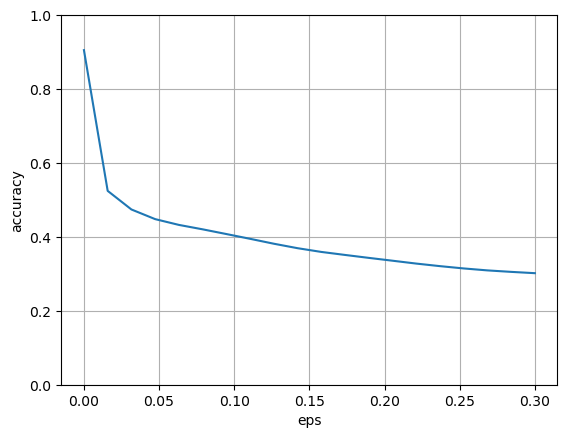

In [7]:
plt.plot(eps_space, unprotected_acc)
plt.xlabel('eps')
plt.ylabel('accuracy')
plt.ylim(ymin=0,ymax=1)
plt.grid()
plt.show()

### Accuracy of the protected model under attack
defender -- can be selected from AdversarialTrainingDefender, QuantizationDefender, DistillationDefender, RegularizationDefender, AutoEncoderDefender and ATQDefender

In [8]:
# Adversarial training on quantized data:
defender = ATQDefender(model)

ATQ training...


Epochs ...:   0%|          | 0/10 [00:00<?, ?it/s]

Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 1, Loss: 0.3352


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 2, Loss: 0.1898


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 3, Loss: 0.1417


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 4, Loss: 0.1212


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 5, Loss: 0.1102


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 6, Loss: 0.1041


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 7, Loss: 0.1018


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 8, Loss: 0.1017


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 9, Loss: 0.0993


Steps ...:   0%|          | 0/8615 [00:00<?, ?it/s]

Epoch 10, Loss: 0.0972


In [9]:
protected_acc = []
for eps in eps_space:
    attacker = FGSMAttacker(model, eps=eps)
    protected_acc.append(accuracy(attacker, defender, step_size=10))

Creating sequence of samples: 100%|██████████| 560/560 [00:01<00:00, 540.93it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 578.68it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 563.36it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 560.19it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 587.94it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 587.63it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 578.35it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 583.99it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:01<00:00, 525.20it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:01<00:00, 517.74it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 576.44it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:01<00:00, 555.83it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:01<00:00, 550.42it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 567.67it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 581.09it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 572.17it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 574.02it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 578.76it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 581.87it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

Creating sequence of samples: 100%|██████████| 560/560 [00:00<00:00, 570.70it/s]


  0%|          | 0/216 [00:00<?, ?it/s]

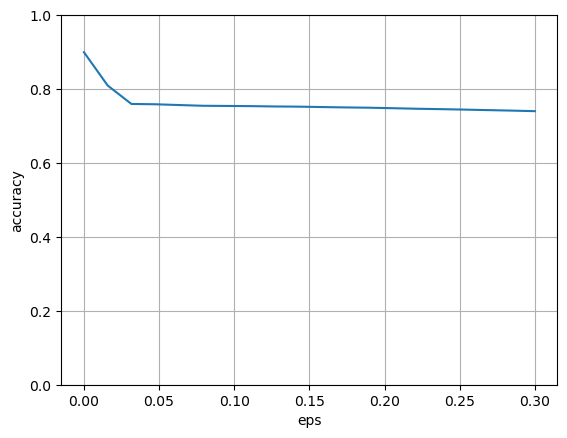

In [10]:
plt.plot(eps_space, protected_acc)
plt.xlabel('eps')
plt.ylabel('accuracy')
plt.ylim(ymin=0,ymax=1)
plt.grid()
plt.show()